In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Walmart (1).csv",index_col = 'Date',na_values = ['?',' '],parse_dates = True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [74]:
df.index.dtypes = pd.to_datetime(df.index)

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
# 1. Possible insights on this dataset

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Weekly_Sales'].plot()

In [ ]:
df.corr()

In [ ]:
# UNIVARIATE ANALYSIS

In [ ]:
# Does temperature affect the weekly sales in any manner
sns.catplot(data = df,x = 'Store',y = 'Weekly_Sales',hue = 'Temperature')
plt.title("Weekly Sales are affected by the Temperature")
plt.xticks(rotation = 90);

In [ ]:
# If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most
sns.catplot(data = df,x = 'Store',y = 'Weekly_Sales',hue = 'Unemployment')
plt.title("Weekly Sales are affected by the Unemployment")
plt.xticks(rotation = 90);

In [ ]:
# How is the Consumer Price index affecting the weekly sales of various stores
sns.catplot(data = df,x = 'Store',y = 'Weekly_Sales',hue = 'CPI')
plt.title("Weekly Sales are affected by the Consumer Price Index")
plt.xticks(rotation = 90);

In [ ]:
# Top performing stores according to the historical data
sns.lineplot(data = df,x = 'Store',y ='Weekly_Sales')
plt.grid(True)
# By this chart we can see that the store '4' and '20' are the top performing Stores.

In [ ]:
df.groupby('Store')['Weekly_Sales'].sum()
# By the chart and value it shows that top store(20) sales = 3e8 and low sales(33) = 3e7.
# So the significant difference is 1e1

In [ ]:
# How is the Fuel_Price affecting the weekly sales of various stores
sns.catplot(data = df,x = 'Store',y = 'Weekly_Sales',hue = 'Fuel_Price')
plt.title("Weekly Sales are affected by the Fuel_Price")
plt.xticks(rotation = 90);

In [ ]:
# How the Weekly_Sales by each store
sns.lineplot(data = df,x = df.index,y = 'Weekly_Sales',hue = 'Store')
plt.xticks(rotation = 45);# Here we can see that what are the stores giving high sales over a period of time

In [ ]:
# Descriptive statistics to check Stationary

In [ ]:
decomposition = seasonal_decompose(df.Weekly_Sales,period = 48)
fig = plt.figure()  
fig = decomposition.plot()

In [ ]:
# In question they ask to find each and every store,so we take top five stationary store
# Inferential statistics to check Stationary
# Augmented Dickey-Fuller (ADF) Test

In [ ]:
a = []
for i in df.Store.unique():
     a.append(adfuller(df.loc[(df['Store'] == i),'Weekly_Sales'])[1])
 
a

In [ ]:
stationarity = pd.DataFrame(columns = ['Store_Number','p_value'])
stationarity['Store_Number'] = df['Store'].unique()
stationarity['p_value'] = a

In [ ]:
stationarity

In [ ]:
# From the observation 8,12,22,23,29 stores are high stationarity than other stores . Here there are 45 stores its not possible to forecast each and every stores so we taking top 5 stationarity stores

In [5]:
s8 =df.loc[df['Store'] == 8]
s12 =df.loc[df['Store'] == 12]
s22 =df.loc[df['Store'] == 22]
s23 =df.loc[df['Store'] == 23]
s29 =df.loc[df['Store'] == 29]

In [ ]:
season_8 = seasonal_decompose(s8['Weekly_Sales'],period = 48)
season_8.plot()

In [ ]:
season_12 = seasonal_decompose(s12['Weekly_Sales'],period = 48)
season_12.plot()

In [ ]:
season_22 = seasonal_decompose(s22['Weekly_Sales'],period = 48)
season_22.plot()

In [ ]:
season_23 = seasonal_decompose(s23['Weekly_Sales'],period = 48)
season_23.plot()

In [ ]:
season_29 = seasonal_decompose(s29['Weekly_Sales'],period = 48)
season_29.plot()

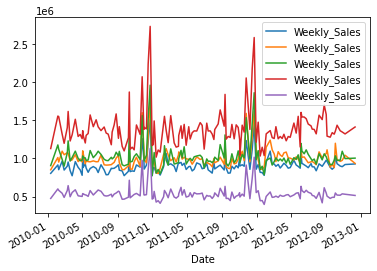

In [54]:
s8['Weekly_Sales'].plot()
s12['Weekly_Sales'].plot()
s22['Weekly_Sales'].plot()
s23['Weekly_Sales'].plot()
s29['Weekly_Sales'].plot()
plt.legend()

In [ ]:
# for these five stores are following with no pattern , but it is not possible to forecast the sales with minimum error . because some of the values are outside the limit i.e say that the values are outliers. So make it differencing or log for making with minimum error

In [ ]:
#   I tried the direct data in arima model  but the error is so high ,so i make it as log values to make more stationary

In [55]:
s8_log = np.log(s8['Weekly_Sales'])
s12_log = np.log(s12['Weekly_Sales'])
s22_log = np.log(s22['Weekly_Sales'])
s23_log = np.log(s23['Weekly_Sales'])
s29_log = np.log(s29['Weekly_Sales'])

In [ ]:
# ARIMA Model 
# Finding the (p,d,q) order by auto_arima

In [ ]:
from pmdarima import auto_arima

In [ ]:
# for 8th store
s8_order = auto_arima(s8_log,trace = True,suppress_warnings = True)
s8_order.summary()

In [ ]:
# for 12th store
s12_order = auto_arima(s12_log,trace = True,suppress_warnings = True)
s12_order.summary()

In [ ]:
# for 22nd store
s22_order = auto_arima(s22_log,trace = True,suppress_warnings = True)
s22_order.summary()

In [ ]:
# for 23rd store
s23_order = auto_arima(s23_log,trace = True,suppress_warnings = True)
s23_order.summary()

In [ ]:
# for 29th store
s29_order = auto_arima(s29_log,trace = True,suppress_warnings = True)
s29_order.summary()

In [ ]:
# SPLITING THE DATASET

In [56]:
s8_train = s8_log.iloc[:120]
s8_test = s8_log.iloc[120:]

s12_train = s12_log.iloc[:120]
s12_test = s12_log.iloc[120:]

s22_train = s22_log.iloc[:120]
s22_test = s22_log.iloc[120:]

s23_train = s23_log.iloc[:120]
s23_test = s23_log.iloc[120:]

s29_train = s29_log.iloc[:120]
s29_test = s29_log.iloc[120:]

In [ ]:
# MODELS,PRIDICTION,EVALUATION,FORECASTING

In [ ]:
# STORE 08

In [57]:
model = ARIMA(s8_train,order = (1,0,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                 103.708
Method:                       css-mle   S.D. of innovations              0.102
Date:                Wed, 01 Feb 2023   AIC                           -201.416
Time:                        13:52:31   BIC                           -193.053
Sample:                             0   HQIC                          -198.019
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.7139      0.015    890.185      0.000      13.684      13.744
ar.L1.Weekly_Sales     0.3995      0.083      4.787      0.000       0.236       0.563
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5030           +0.0000j            2.5030            0.0000
-----------------------------------------------------------------------------
"""

In [60]:
pred_8 = model.predict(start = len(s8_train),end = len(s8_train)+len(s8_test) - 1,typ = 'levels')
pred_8

120    13.718551
121    13.715775
122    13.714665
123    13.714222
124    13.714045
125    13.713974
126    13.713946
127    13.713935
128    13.713930
129    13.713928
130    13.713928
131    13.713927
132    13.713927
133    13.713927
134    13.713927
135    13.713927
136    13.713927
137    13.713927
138    13.713927
139    13.713927
140    13.713927
141    13.713927
142    13.713927
dtype: float64

In [61]:
mean_squared_error(s8_test,pred_8)

0.0012782311004783224

In [89]:
a8  = model.forecast(steps = 12)
forecast_8 = pd.DataFrame(columns = ['Weekly_Sales'])
forecast_8['Weekly_Sales'] = np.exp(a8[0])
forecast_8

,Weekly_Sales
0,907592.736015
1,905076.316649
2,904072.900822
3,903672.324160
4,903512.334180
5,903448.422417
6,903422.889459
7,903412.688656
8,903408.613233
9,903406.985012


In [ ]:
# Store 12

In [90]:
model_12 = ARIMA(s12_train,order = (1,0,0))
model_12 = model_12.fit()
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                  90.781
Method:                       css-mle   S.D. of innovations              0.113
Date:                Wed, 01 Feb 2023   AIC                           -175.562
Time:                        15:30:31   BIC                           -167.199
Sample:                             0   HQIC                          -172.166
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.8230      0.019    721.722      0.000      13.785      13.861
ar.L1.Weekly_Sales     0.4631      0.080      5.759      0.000       0.305       0.621
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1593           +0.0000j            2.1593            0.0000
-----------------------------------------------------------------------------
"""

In [91]:
pred_12 = model_12.predict(start = len(s12_train),end = len(s12_train)+len(s12_test) - 1,typ = 'levels')
pred_12

120    13.828919
121    13.825738
122    13.824264
123    13.823582
124    13.823266
125    13.823120
126    13.823052
127    13.823021
128    13.823006
129    13.822999
130    13.822996
131    13.822995
132    13.822994
133    13.822994
134    13.822994
135    13.822994
136    13.822993
137    13.822993
138    13.822993
139    13.822993
140    13.822993
141    13.822993
142    13.822993
dtype: float64

In [92]:
mean_squared_error(s12_test,pred_12)

0.003919883326761425

In [93]:
a12  = model_12.forecast(steps = 12)
forecast_12 = pd.DataFrame(columns = ['Weekly_Sales'])
forecast_12['Weekly_Sales'] = np.exp(a12[0])
forecast_12

,Weekly_Sales
0,1.013499e+06
1,1.010280e+06
2,1.008792e+06
3,1.008104e+06
4,1.007786e+06
5,1.007638e+06
6,1.007570e+06
7,1.007538e+06
8,1.007524e+06
9,1.007517e+06


In [ ]:
# Store 22

In [94]:
model_22 = ARIMA(s22_train,order = (2,0,0))
model_22 = model_22.fit()
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  120
Model:                     ARMA(2, 0)   Log Likelihood                  77.959
Method:                       css-mle   S.D. of innovations              0.126
Date:                Wed, 01 Feb 2023   AIC                           -147.919
Time:                        15:31:46   BIC                           -136.769
Sample:                             0   HQIC                          -143.391
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.8345      0.023    589.887      0.000      13.789      13.880
ar.L1.Weekly_Sales     0.3866      0.090      4.296      0.000       0.210       0.563
ar.L2.Weekly_Sales     0.1273      0.090      1.418      0.156      -0.049       0.303
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6690           +0.0000j            1.6690            0.0000
AR.2           -4.7053           +0.0000j            4.7053            0.5000
-----------------------------------------------------------------------------
"""

In [95]:
pred_22 = model_22.predict(start = len(s22_train),end = len(s22_train)+len(s22_test) - 1,typ = 'levels')
pred_22

120    13.819242
121    13.824452
122    13.828658
123    13.830947
124    13.832368
125    13.833209
126    13.833715
127    13.834017
128    13.834199
129    13.834308
130    13.834373
131    13.834412
132    13.834435
133    13.834449
134    13.834458
135    13.834463
136    13.834466
137    13.834467
138    13.834468
139    13.834469
140    13.834470
141    13.834470
142    13.834470
dtype: float64

In [96]:
mean_squared_error(s22_test,pred_22)

0.0033288279629453553

In [97]:
a22 = model_22.forecast(steps = 12)
forecast_22 = pd.DataFrame(columns = ['Weekly_Sales'])
forecast_22['Weekly_Sales'] = np.exp(a8[0])
forecast_22

,Weekly_Sales
0,907592.736015
1,905076.316649
2,904072.900822
3,903672.324160
4,903512.334180
5,903448.422417
6,903422.889459
7,903412.688656
8,903408.613233
9,903406.985012


In [ ]:
# Store 23

In [98]:
model_23 = ARIMA(s23_train,order = (2,0,1))
model_23 = model_23.fit()
model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  120
Model:                     ARMA(2, 1)   Log Likelihood                  70.934
Method:                       css-mle   S.D. of innovations              0.134
Date:                Wed, 01 Feb 2023   AIC                           -131.868
Time:                        15:32:58   BIC                           -117.931
Sample:                             0   HQIC                          -126.208
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 14.1211      0.030    469.515      0.000      14.062      14.180
ar.L1.Weekly_Sales    -0.2186      0.131     -1.667      0.096      -0.476       0.038
ar.L2.Weekly_Sales     0.5297      0.086      6.131      0.000       0.360       0.699
ma.L1.Weekly_Sales     0.7207      0.128      5.647      0.000       0.471       0.971
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1830           +0.0000j            1.1830            0.5000
AR.2            1.5958           +0.0000j            1.5958            0.0000
MA.1           -1.3876           +0.0000j            1.3876            0.5000
-----------------------------------------------------------------------------
"""

In [99]:
pred_23 = model_23.predict(start = len(s23_train),end = len(s23_train)+len(s23_test) - 1,typ = 'levels')
pred_23

120    14.098458
121    14.116422
122    14.110138
123    14.121028
124    14.115318
125    14.122335
126    14.117776
127    14.122489
128    14.119044
129    14.122294
130    14.119758
131    14.122035
132    14.120194
133    14.121802
134    14.120475
135    14.121617
136    14.120665
137    14.121478
138    14.120795
139    14.121375
140    14.120887
141    14.121301
142    14.120952
dtype: float64

In [100]:
mean_squared_error(s23_test,pred_23)

0.009382443282328179

In [101]:
a23  = model_23.forecast(steps = 12)
forecast_23 = pd.DataFrame(columns = ['Weekly_Sales'])
forecast_23['Weekly_Sales'] = np.exp(a23[0])
forecast_23

,Weekly_Sales
0,1.327035e+06
1,1.351090e+06
2,1.342626e+06
3,1.357327e+06
4,1.349598e+06
5,1.359102e+06
6,1.352920e+06
7,1.359312e+06
8,1.354637e+06
9,1.359047e+06


In [ ]:
# Store 29

In [102]:
model_29 = ARIMA(s29_train,order = (1,0,0))
model_29 = model_29.fit()
model_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  120
Model:                     ARMA(1, 0)   Log Likelihood                  63.556
Method:                       css-mle   S.D. of innovations              0.142
Date:                Wed, 01 Feb 2023   AIC                           -121.112
Time:                        15:33:46   BIC                           -112.750
Sample:                             0   HQIC                          -117.716
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 13.1885      0.023    579.514      0.000      13.144      13.233
ar.L1.Weekly_Sales     0.4326      0.082      5.297      0.000       0.273       0.593
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3117           +0.0000j            2.3117            0.0000
-----------------------------------------------------------------------------
"""

In [105]:
pred_29 = model_29.predict(start = len(s29_train),end = len(s29_train)+len(s29_test) - 1,typ = 'levels')
pred_29

120    13.196135
121    13.191797
122    13.189920
123    13.189108
124    13.188757
125    13.188605
126    13.188539
127    13.188511
128    13.188499
129    13.188493
130    13.188491
131    13.188490
132    13.188490
133    13.188489
134    13.188489
135    13.188489
136    13.188489
137    13.188489
138    13.188489
139    13.188489
140    13.188489
141    13.188489
142    13.188489
dtype: float64

In [106]:
mean_squared_error(s29_test,pred_29)

0.006936793502923274

In [107]:
a29  = model_29.forecast(steps = 12)
forecast_29 = pd.DataFrame(columns = ['Weekly_Sales'])
forecast_29['Weekly_Sales'] = np.exp(a29[0])
forecast_29

,Weekly_Sales
0,538280.386149
1,535950.197946
2,534945.347548
3,534511.259504
4,534323.593528
5,534242.434553
6,534207.331122
7,534192.147011
8,534185.578896
9,534182.737726
